In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel(r"/Users/sanketdhameliya/Desktop/Data Science/basic notebooks/projects ml/Arlines project price prediction/Data_Train.xlsx")
test_data = pd.read_excel(r"/Users/sanketdhameliya/Desktop/Data Science/basic notebooks/projects ml/Arlines project price prediction/Test_set.xlsx")

In [3]:
train_data.shape

(10683, 11)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
values = train_data.values
print(values)

[['IndiGo' '24/03/2019' 'Banglore' ... 'non-stop' 'No info' 3897]
 ['Air India' '1/05/2019' 'Kolkata' ... '2 stops' 'No info' 7662]
 ['Jet Airways' '9/06/2019' 'Delhi' ... '2 stops' 'No info' 13882]
 ...
 ['Jet Airways' '27/04/2019' 'Banglore' ... 'non-stop' 'No info' 7229]
 ['Vistara' '01/03/2019' 'Banglore' ... 'non-stop' 'No info' 12648]
 ['Air India' '9/05/2019' 'Delhi' ... '2 stops' 'No info' 11753]]


In [7]:
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [8]:
list(set(train_data))

['Destination',
 'Airline',
 'Dep_Time',
 'Additional_Info',
 'Total_Stops',
 'Arrival_Time',
 'Duration',
 'Source',
 'Date_of_Journey',
 'Route',
 'Price']

In [9]:
train_data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
train_data.dropna(inplace=True)

In [13]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [15]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


## Data cleaning and analysis and feature engeeniering

In [16]:
data = train_data.copy()

In [17]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [19]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [20]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_datetime(feature)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [22]:
data['Journy_day'] = data['Date_of_Journey'].dt.day

In [23]:
data['Journy_month'] = data['Date_of_Journey'].dt.month

In [24]:
data['Journy_year'] = data['Date_of_Journey'].dt.year

In [25]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_day,Journy_month,Journy_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-13 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-13 05:50:00,2023-09-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-13 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [26]:
def extract_hour_min(df, col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_minute'] = df[col].dt.minute
    return df.head(3)

In [27]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journy_day', 'Journy_month',
       'Journy_year'],
      dtype='object')

In [28]:
extract_hour_min(data, 'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_day,Journy_month,Journy_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-13 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-13 05:50:00,2023-09-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-13 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [29]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_day,Journy_month,Journy_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-13 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-13 05:50:00,2023-09-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-13 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [30]:
col_to_drop = ['Arrival_Time', 'Dep_Time']
data.drop(col_to_drop, axis=1, inplace=True)

In [31]:
data.shape

(10682, 16)

In [32]:
# Analyse when will most of the flight take-off
def flight_dep_time(t):
    if (t>4) and (t<=8):
        return 'Early Morning'
    elif (t>8) and (t<=12):
        return 'Morning'
    elif (t>12) and (t<=16):
        return 'Afternoon'
    elif (t>16) and (t<=20):
        return 'Evening'
    elif (t>20) and (t<=24):
        return 'Night'
    else:
        return 'Late Night'

<AxesSubplot:xlabel='Dep_Time_hour'>

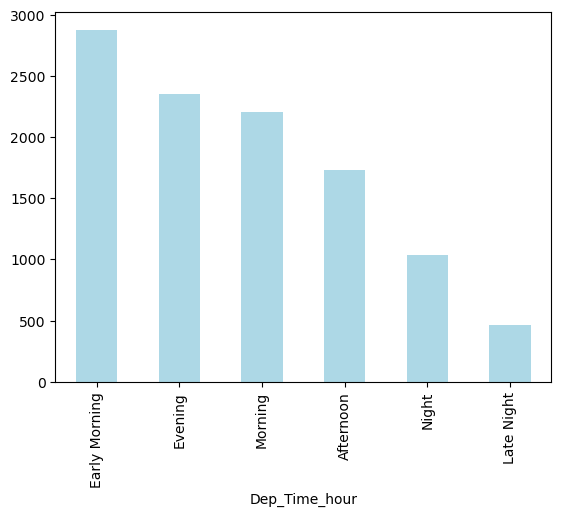

In [33]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar', color='LightBlue')

In [34]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

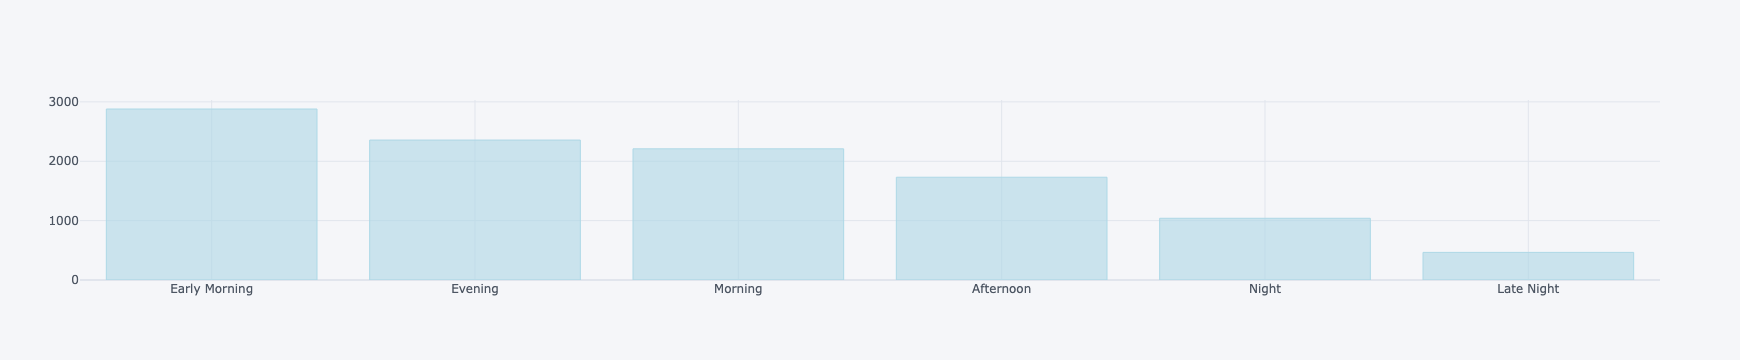

In [35]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar', color='LightBlue')

In [36]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h'+ ' ' + x
    elif 'm' not in x:
        x = x+ ' ' + '0m'
    return x


In [37]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [38]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [39]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [40]:
data['Duration_minutes'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))


In [41]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journy_day,Journy_month,Journy_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50


In [42]:
# duration impect on price or not
# Eval() 
data['Duration_total_minutes'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

<AxesSubplot:xlabel='Duration_total_minutes', ylabel='Price'>

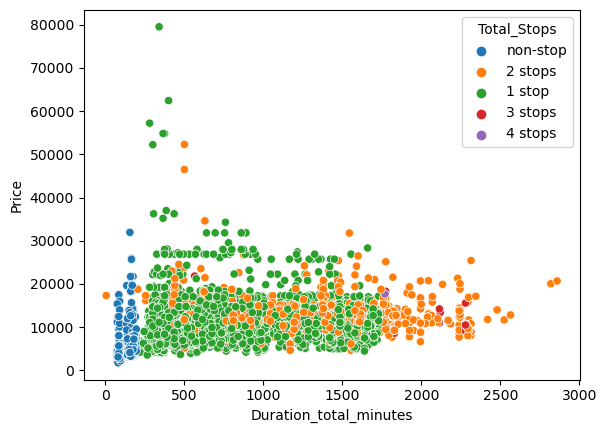

In [43]:
# scatter plot for relationship between feature and see best fit line
sns.scatterplot(x='Duration_total_minutes', y='Price', hue='Total_Stops', data=data)

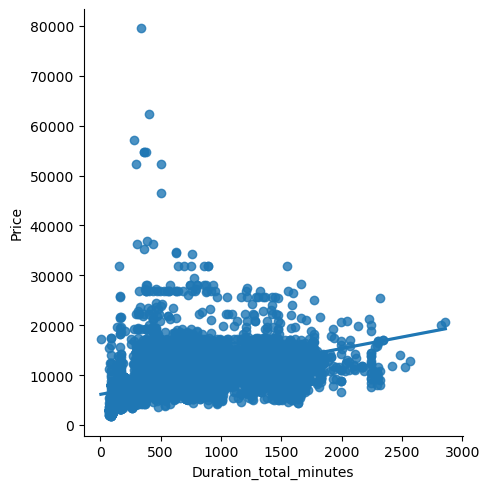

In [44]:
sns.lmplot(x='Duration_total_minutes', y='Price', data=data)

In [45]:
# which route jet airways is extreamly used
# arlines vs price analysis
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journy_day',
       'Journy_month', 'Journy_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes', 'Duration_total_minutes'],
      dtype='object')

In [46]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

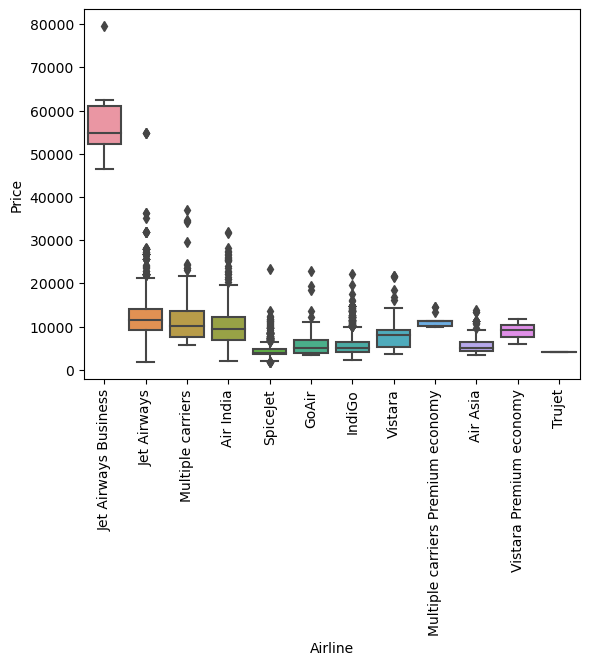

In [47]:
# visulization of arlines vs price analysis
sns.boxplot(y="Price", x='Airline', data=data.sort_values('Price', ascending=False))
plt.xticks(rotation='vertical')
plt.show()

##### applying one-hot encoading/Feature Encoading, im using it because i have nominal data
##### if i have ordinal data you should use lable encoading
##### if your needed feature has 11 sub-categories it means you are going to make 11 more features so that my ML algoritham is able to understand what is that subcategories all about. if you have to create 100 features just to explain this sourse feature to my ML algorithm, this will creat issue often time as a curse of dimensinality.


In [48]:
# applying one-hot encoading/Feature Encoading,
cat_col = [col for col in data.columns if data[col].dtype=='object']

In [49]:
num_col = [col for col in data.columns if data[col].dtype!='object']

In [50]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [51]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [52]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [53]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journy_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [54]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [55]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journy_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [56]:
data['Airline'].nunique()

12

##### based on airline feature we have to create 12 more unnecessory feature which would create isuue known as curse of dimentionality. so if you have more category is alwayse good to use some optimize feature encoading technique

In [57]:
# perform target guid encoading on data
# manual encoading on data
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [58]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [59]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [60]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [61]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [62]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [63]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [64]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [65]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [66]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [67]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [68]:
data['Destination'] = data['Destination'].map(dict_dest)

In [69]:
data['Destination'] 

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [70]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journy_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [71]:
# perform manual encoading
# remove unnecessory features
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [72]:
# we use lable encoading for ordinal data like total_stop
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [73]:
data['Total_Stops'] = data['Total_Stops'].map(stop) 

In [74]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [75]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [76]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journy_day',
       'Journy_month', 'Journy_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes', 'Duration_total_minutes', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [77]:
data.drop(columns=['Additional_Info', 'Date_of_Journey', 'Source', 'Duration_minutes', 'Journy_year' ], axis=1, inplace=True)

In [78]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journy_day', 'Journy_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_total_minutes', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [79]:
data.drop(columns=['Route'], axis=1, inplace=True)

In [80]:
data.drop(columns=['Duration'], axis=1, inplace=True)

In [81]:
# handling outliers
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2, orient='h')
    sns.distplot(df[col], ax=ax3, kde=False)

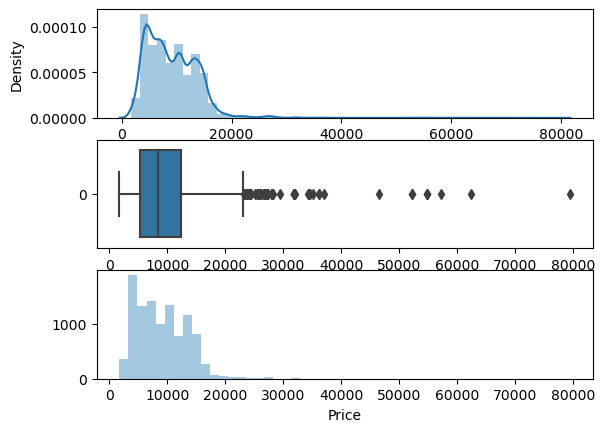

In [82]:
plot(data, 'Price')

In [83]:
# if you have skwness like this there is one of the best approach is IQR approach(inter quartile range)
# if you have outliers you can replace it with median is one of the best approach
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75) 

iqr =  q3-q1

maximum = q3+1.5*iqr
minimum = q1-1.5*iqr

In [84]:
maximum

23017.0

In [85]:
minimum

-5367.0

In [86]:
print([price for price in data['Price'] if price>maximum or  price <minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [87]:
len([price for price in data['Price'] if price>maximum or  price <minimum])

94

In [88]:
data['Price'] = np.where(data['Price']>35000, data['Price'].median(), data['Price'])

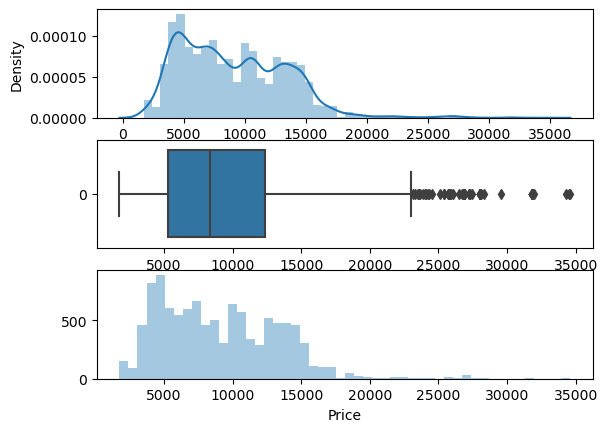

In [89]:
plot(data, 'Price')

## Feature selection

In [90]:
# Feature selection
# price is my target/dependent feature  
X= data.drop(['Price'], axis=1)

In [91]:
y = data['Price']

In [92]:
from sklearn.feature_selection import mutual_info_regression

In [93]:
imp = mutual_info_regression(X, y)

In [94]:
imp

array([0.98482641, 0.99501577, 0.79048594, 0.22516208, 0.62861999,
       0.34446546, 0.2599443 , 0.40421873, 0.35861024, 0.471804  ,
       0.48912784, 0.39274122, 0.44760616, 0.52207822, 0.13983751,
       0.19641214])

In [95]:
imp_df = pd.DataFrame(imp, index=X.columns)

In [96]:
imp_df.columns = ['Importance']

In [97]:
imp_df

,Importance
Airline,0.984826
Destination,0.995016
Total_Stops,0.790486
Journy_day,0.225162
Journy_month,0.628620
Dep_Time_hour,0.344465
Dep_Time_minute,0.259944
Arrival_Time_hour,0.404219
Arrival_Time_minute,0.358610
Duration_hours,0.471804


In [98]:
imp_df.sort_values(by='Importance', ascending=False)

,Importance
Destination,0.995016
Airline,0.984826
Total_Stops,0.790486
Journy_month,0.628620
Source_Delhi,0.522078
Duration_total_minutes,0.489128
Duration_hours,0.471804
Source_Kolkata,0.447606
Arrival_Time_hour,0.404219
Source_Banglore,0.392741


## Model building

In [137]:
# before bulding model we do training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

[CV] END max_depth=30, max_features=auto, min_samples_split=15, n_estimators=760; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=   4.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_split=15, n_estimators=980; total time=   5.0s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=10, n_estimators=540; total time=   2.7s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_split=5, n_estimators=1200; total time=   0.0s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=100, n_estimators=760; total time=   2.7s
[CV] END max_depth=30, max_features=auto, min_samples_split=10, n_estimators=1200; total time

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
ml_model = RandomForestRegressor()

In [103]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [104]:
y_pred = ml_model.predict(X_test)

In [105]:
y_pred

array([16877.73,  5541.66,  8884.14, ...,  3505.07,  6238.16,  6799.07])

In [106]:
from sklearn import metrics

In [107]:
metrics.r2_score(y_test , y_pred)

0.8179298387056966

## Saving the model

In [108]:
import pickle

In [109]:
file = open(r'rf_random.pkl', 'wb')

In [112]:
pickle.dump(ml_model, file)

In [113]:
model = open(r'rf_random.pkl', 'rb')

In [114]:
forest = pickle.load(model)

In [115]:
y_pred2 = forest.predict(X_test)

In [117]:
y_pred2

array([16877.73,  5541.66,  8884.14, ...,  3505.07,  6238.16,  6799.07])

In [118]:
metrics.r2_score(y_test, y_pred2)

0.8179298387056966

In [119]:
# how to define evaluation matrics
# mean absolute % error
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [120]:
mape(y_test, y_pred)

13.053717657419137

In [121]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9511241441939764
predictions are : [16731.06  5563.76  8864.92 ...  3552.32  6322.01  6811.77]


r2 score : 0.8172282315041558
MAE : 1160.8147745993138
MSE : 3558127.6192197725
RMSE : 1886.2999812383428
MAPE : 13.049413594889636


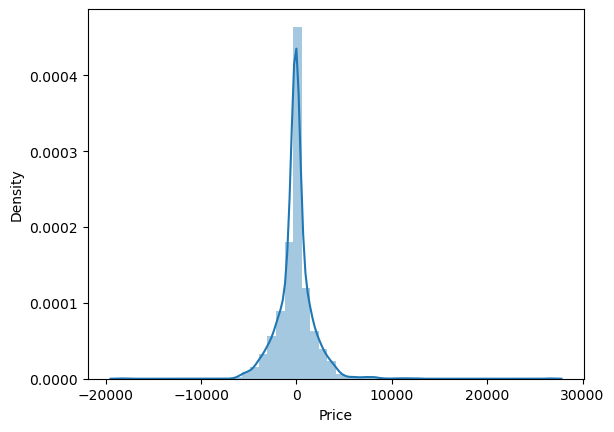

In [122]:
predict(RandomForestRegressor())

In [123]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are : [16840.  4959.  9397. ...  3419.  5797.  6386.]


r2 score : 0.740578350237501
MAE : 1331.479283664046
MSE : 5050316.822121761
RMSE : 2247.290996315733
MAPE : 15.016785268130093


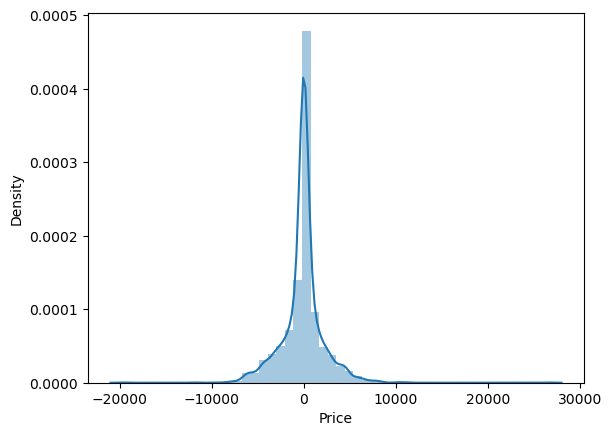

In [124]:
predict(DecisionTreeRegressor())

In [125]:
RandomForestRegressor()

RandomForestRegressor()

## HyperParameter Tuning

In [126]:
from sklearn.model_selection import RandomizedSearchCV

In [127]:
reg_rf = RandomForestRegressor()

In [128]:
np.linspace(start = 100, stop = 1200, num = 6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [129]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 6)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 4)]
min_samples_split = [5, 10, 15, 100]

In [130]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split}

In [131]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [132]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, n_jobs=-1, verbose=2)

In [133]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [134]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [135]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=760)

In [136]:
rf_random.best_score_

0.8013012197185579